In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## Boxplot - tilastollisia tunnuslukuja grafiikkana

**Boxplot** havainnollistaa määrällisen muuttujan arvojen jakaumaa tilastollisten tunnuslukujen avulla. Sillä on monta nimeä kuten box & whisker, ruutu- ja janakaavio, laatikko- ja viiksikaavio, tai laatikko- ja janakaavio. Kaavio esittää viiden luvun yhteenvedon:

- pienin arvo
- alaneljännes/alakvartiili (arvo, jota pienmpiä on neljäsosa arvoista)
- mediaani (arvo, jota pienempiä on puolet arvoista)
- yläneljännes/yläkvartiili (arvo, jota pienempiä on kolme neljäsosaa arvoista)
- suurin arvo

Lisäksi kaaviossa esitetään muista arvoista selvästi poikkeavat arvot erillisinä pisteinä, jotta niihin osataan kiinnittää huomiota.

Kaavio koostuu laatikosta, jonka reunat vastaavat alaneljännestä ja yläneljännestä. Laatikon sisään on merkitty viivalla mediaanin sijainti. Laatikon päistä lähtee janat, joiden päätepisteet vastaavat pienintä ja suurinta arvoa paitsi silloin kun selvästi muista poikkeavia arvoja on merkitty erillisillä pisteillä. Oletuksena erillisinä pisteinä piirretään havainnot, jotka ovat yli 1,5 kvartiilivälin (yläneljännes-alaneljännes) päässä laatikon reunasta.

Seabornin boxplotista löydät lisätietoa https://seaborn.pydata.org/generated/seaborn.boxplot.html.

### Tuonnit ja alkuvalmistelut

- Grafiikan tyylimäärittelyssä voit käyttää **'whitegrid'** sijasta **'white'**, **'dark'**, **'darkgrid'** tai **'ticks'**. Voit myös jättää tyylimäärittelyn tekemättä.
- **MultipleLocator** auttaa muuttamaan akselin asteikon jaotusta.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.ticker import MultipleLocator

### Datan avaaminen

Seaborn-paketin esimerkkidata **penguins** sisältää tietoja pingviinilajeista eri saarilla.

In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Yhden muuttujan boxplot

- Parametri `showmeans=True` tuo keskiarvon kaavioon (pieni kolmio). Keskiarvoa ja mediaania vertaamalla voit tehdä päätelmiä jakauman mahdollisesta vinoudesta.
- **plt** viittaa **matplotlib.pyplot**-pakettiin, joka sisältää oikotien moniin muotoiluihin. Lisätietoa https://matplotlib.org/stable/api/pyplot_summary.html.
- Kaikkea ei voi tehdä **plt**:n kautta, vaan vaativammassa muotoilussa viitataan suoraan kaavioon (**Axes**-luokan olio) ja sen ominaisuuksiin. Tätä varten kaavio sijoitetaan muuttujan arvoksi. Seuraavassa solussa muuttujan nimeksi on annettu **ax**. Lisätietoa **Axes**-luokasta https://matplotlib.org/stable/api/axes_api.html.
- **MultipleLocator** säätää arvoakselin jaotuksen viiden välein.

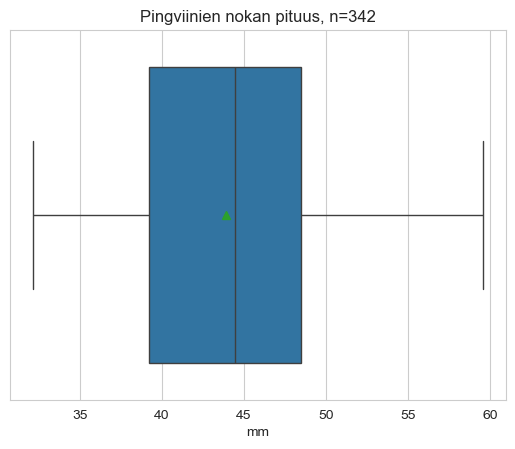

In [4]:
ax = sns.boxplot(penguins, x='bill_length_mm', showmeans=True)
plt.title(f'Pingviinien nokan pituus, n={penguins['bill_length_mm'].count()}')
plt.xlabel('mm')
ax.xaxis.set_major_locator(MultipleLocator(5))

### Useamman muuttujan boxplot

Voit esittää useamman muuttujan boxplotin antamalla muuttujien listan parametrina.

Vaaka-akselin nimet (**xticks**) on seuraavassa korvattu suomenkielisillä nimillä. Ennen korvaamista on tärkeää katsoa kaaviosta oletusnimien järjestys, jotta korvaaminen osataan tehdä oikeassa järjestyksessä. **plt.xticks**-funktion ensimmäinen parametri on viittaus korvattavien nimien numeroihin [0, 1] ja toinen parametri sisältää korvaavien nimien listan.

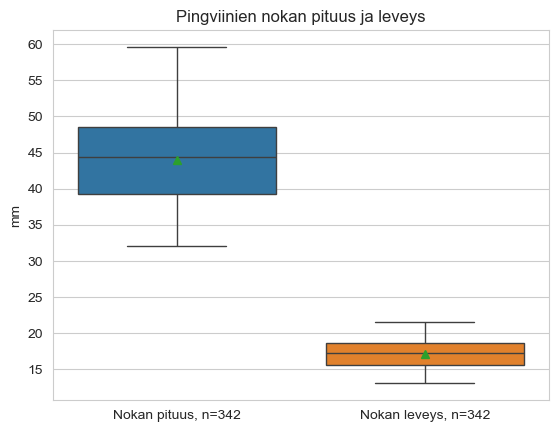

In [5]:
ax = sns.boxplot(penguins[['bill_length_mm', 'bill_depth_mm']], showmeans=True)
plt.title('Pingviinien nokan pituus ja leveys')
plt.ylabel('mm')
plt.xticks([0, 1], [f'Nokan pituus, n={penguins['bill_length_mm'].count()}', 
                    f'Nokan leveys, n={penguins['bill_depth_mm'].count()}'])
ax.yaxis.set_major_locator(MultipleLocator(5))

### Ryhmittely kategoristen muuttujien mukaan

Ryhmittely toteutaan **x**-parametrina (tai **y**-parametrina, jos määrällinen muuttuja annetaan **x**-parametrina).

([<matplotlib.axis.XTick at 0x1db02ea11d0>,
 [Text(0, 0, 'Adelie, n=151'),
  Text(1, 0, 'Chinstrap, n=68'),
  Text(2, 0, 'Gentoo, n=123')])

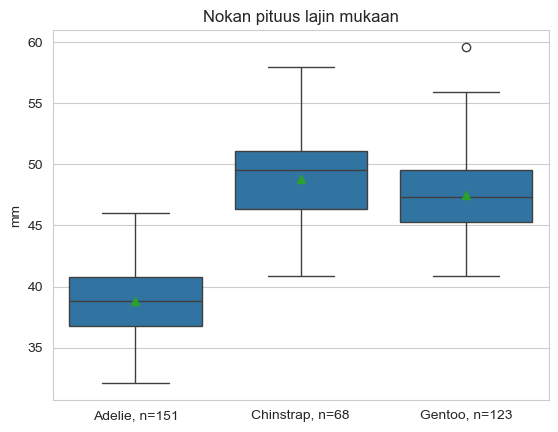

In [6]:
sns.boxplot(data=penguins, x='species', y='bill_length_mm', showmeans=True)
plt.title('Nokan pituus lajin mukaan')
plt.xlabel('')
plt.ylabel('mm')
n_arvot = penguins.groupby('species')['bill_length_mm'].count()
plt.xticks([0, 1, 2], [f'Adelie, n={n_arvot['Adelie']}', 
                       f'Chinstrap, n={n_arvot['Chinstrap']}', 
                       f'Gentoo, n={n_arvot['Gentoo']}'])

Seuraavassa lisätään ylimääräinen ryhmittelevä muuttuja **hue**-parametrina.

Huomaa, miten selitteen otsikko vaihdetaan. Lisätietoa selitteen muokkaamisesta https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html.

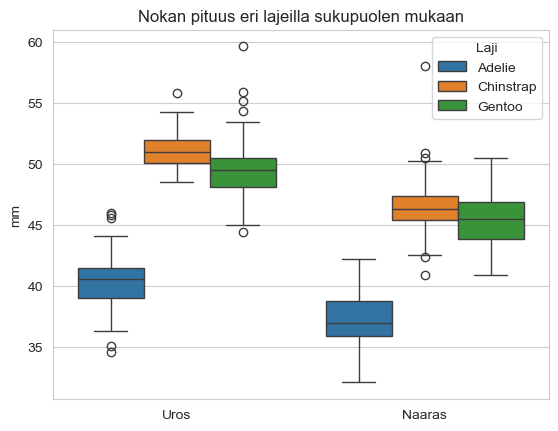

In [7]:
sns.boxplot(data=penguins, x='sex', y='bill_length_mm', hue='species')
plt.title('Nokan pituus eri lajeilla sukupuolen mukaan')
plt.xlabel('')
plt.ylabel('mm')
plt.xticks([0, 1], ['Uros', 'Naaras'])
plt.legend(title='Laji')

Havaintojen lukumäärät eri ryhmissä (**n-arvot**) olisi aina syytä tarkistaa. Edellisen kaavion kuuden ryhmän n-arvoja on vaikea sijoittaa kaavioon, mutta ne ovat helposti laskettavissa komennolla `penguins.groupby(['sex', 'species'])['bill_length_mm'].count()`. Samassa yhteydessä voidaan laskea myös muut tunnusluvut **describe**-funktiolla kuten seuraavassa on tehty:

In [8]:
penguins.groupby(['sex', 'species'])['bill_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
sex    species                                                              
Female Adelie      73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
       Chinstrap   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
       Gentoo      58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
Male   Adelie      73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
       Chinstrap   34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
       Gentoo      61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
sex    species          
Female Adelie     42.2  
       Chinstrap  58.0  
       Gentoo     50.5  
Male   Adelie     46.0  
       Chinstrap  55.8  
       Gentoo     59.6

### Usean kaavion yhdistelmä

Usean kaavion yhdistelmä voidaan luoda **plt.subplots**-funktiolla, joka palauttaa kuvion (**figure**) ja kuvion sisään sijoitettujen kaavioiden listan. Seuraavassa nämä on sijoitettu muuttujien **fig** ja **axs** arvoiksi. Parametrin `ncols=2` mukaisesti luodaan kuvio, joka sisältää kaksi kaaviota vierekkäin. Kaavioilla on yhteinen y-akseli (`sharey=True`) ja kuvion koko on **12.8 x 4.8**. Oletuskuvion koko olisi ollut **6.4 x 4.8**. Lisätietoa usean kaavion yhdistelmistä https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html.

- Koko kuvion otsikko määritellään **plt.suptitle**-funktiolla.
- Kuvion sisällä sijaitseviin kaavioihin voi viitata **axs[0]** ja **axs[1]**. Kaaviot luodaan normaaliin tapaan, mutta ylimääräisenä parametrina **ax** annetaan viittaus kaavion sijaintiin kuvion sisällä, esimerkiksi `ax=axs[0]`.
- Usean kaavion yhdistelmissä kannattaa yksittäisen kaavion muotoiluun käyttää **plt**:n sijasta suoraa viittausta muotoiltavaan kaavioon (esimerkiksi `axs[0]`). Lisätietoa https://matplotlib.org/stable/api/axes_api.html.

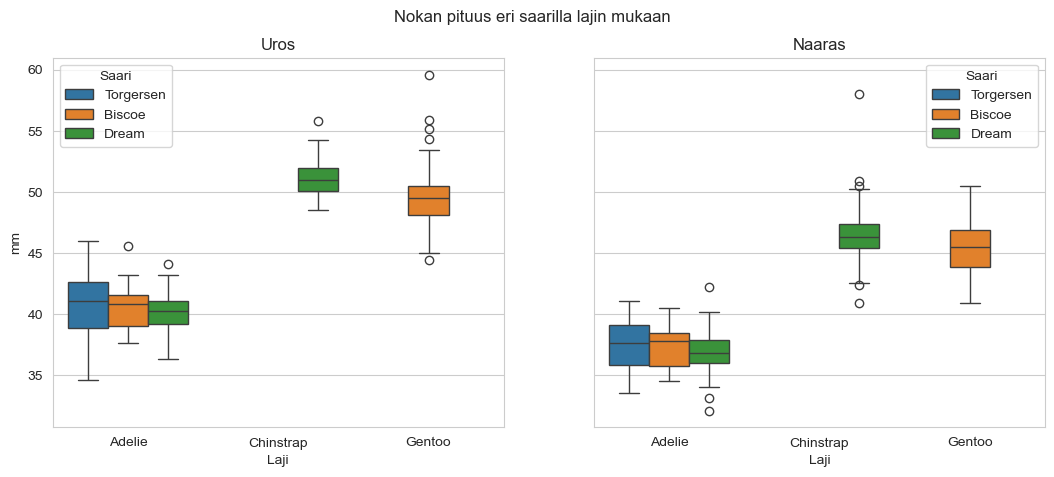

In [9]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12.8, 4.8))
plt.suptitle('Nokan pituus eri saarilla lajin mukaan')

# Urokset
sns.boxplot(penguins[penguins['sex']=='Male'], x='species', y='bill_length_mm', hue='island', ax=axs[0])
axs[0].set_title('Uros')
axs[0].set_ylabel('mm')
axs[0].set_xlabel('Laji')
axs[0].legend().set_title('Saari')

# Naaraat
sns.boxplot(penguins[penguins['sex']=='Female'], x='species', y='bill_length_mm', hue='island', ax=axs[1])
axs[1].set_title('Naaras')
axs[1].set_xlabel('Laji')
axs[1].legend().set_title('Saari')

Seuraavassa vielä n-arvot ja samalla muut tunnusluvut taulukkona.

In [10]:
penguins.groupby(['sex', 'island', 'species'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%  \
sex    island    species                                                        
Female Biscoe    Adelie      22.0  187.181818  6.744567  172.0  184.25  187.0   
                 Gentoo      58.0  212.706897  3.897856  203.0  210.00  212.0   
       Dream     Adelie      27.0  187.851852  5.510156  178.0  185.00  188.0   
                 Chinstrap   34.0  191.735294  5.754096  178.0  187.25  192.0   
       Torgersen Adelie      24.0  188.291667  4.638958  176.0  186.00  189.0   
Male   Biscoe    Adelie      22.0  190.409091  6.463517  180.0  185.75  191.0   
                 Gentoo      61.0  221.540984  5.673252  208.0  218.00  221.0   
       Dream     Adelie      28.0  191.928571  6.803749  178.0  188.50  190.5   
                 Chinstrap   34.0  199.911765  5.976558  187.0  196.00  200.5   
       Torgersen Adelie      23.0  194.913043  5.915412  181.0  192.00  195.0   

                               75%    max  
sex    island    species                   
Female Biscoe    Adelie     191.75  199.0  
                 Gentoo     215.00  222.0  
       Dream     Adelie     191.00  202.0  
                 Chinstrap  195.75  202.0  
       Torgersen Adelie     191.00  196.0  
Male   Biscoe    Adelie     194.75  203.0  
                 Gentoo     225.00  231.0  
       Dream     Adelie     196.00  208.0  
                 Chinstrap  203.00  212.0  
       Torgersen Adelie     198.00  210.0

### Catplot

Seabornin **catplot**-funktio on oikotie usean kaavion yhdistelmiin kategoristen muuttujien määrittämissä ryhmissä. Lisätietoa https://seaborn.pydata.org/generated/seaborn.catplot.html.

Seuraavassa edellinen kaavio on toteutettu **catplot**-funktiolla. Kaaviolaji määritetään parametrina `kind='box'`.

**catplot** palauttaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun. Esimerkissä olio sijoitetaan **g**-nimiseen muuttujaan. Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html.

Yksittäisiin kaavioihin voidaan viitata rivi-ja sarakenumeroiden avulla, esimerkiksi `g.axes[0, 0]`. Rivinumero on pakollinen vaikka kuvia olisi vain yhdellä rivillä kuten tässä esimerkissä.

Text(0.5, 1.0, 'Naaras')

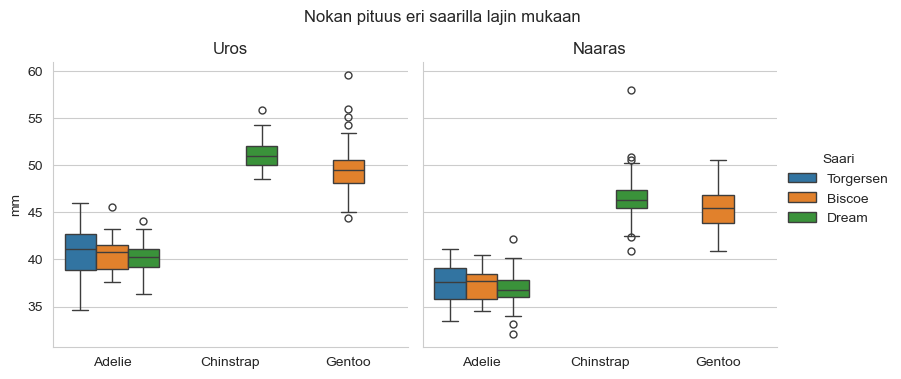

In [11]:
g = sns.catplot(data=penguins, y='bill_length_mm', x='species', col='sex', hue='island', kind='box', height=4)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Nokan pituus eri saarilla lajin mukaan')
g.set_axis_labels('', 'mm')
g.legend.set_title('Saari')
g.axes[0, 0].set_title('Uros')
g.axes[0, 1].set_title('Naaras')

### Muuta huomioitavaa

#### Fontit

Tekstiä lisäävät funktiot (**plt.title**, **plt.xlabel**, **plt.xticks** jne.) tunnistavat tekstiin liittyviä parametreja https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text kuten esimerkiksi **fontsize** ja **fontstyle**.

Jos haluat tehdä kerralla koko muistiota koskevia fonttimuutoksia, niin katso [matplotlib7.ipynb](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb).

#### Värit

Kaavion väripaletin voit vaihtaa antamalla kaavionluonti-komennossa arvo **palette**-parametrille. Esimerkiksi `palette='Set1'` muuttaa paletiksi **Set1** tai `palette=['green', 'red']` muuntaa kahdenvärisiä pylväitä sisältävän kaavion pylväät vihreiksi ja punaisiksi.

Jos haluat käyttää kaikissa muistion kaavioissa samaa vaihtoehtoista palettia, niin käytä **sns.set_palette**-funktiota, esimerkiksi `sns.set_palette('Set1')`.

- Värejä https://matplotlib.org/stable/gallery/color/named_colors.html.
- Paletteja https://matplotlib.org/stable/gallery/color/colormap_reference.html.

#### Kuvion koko

Kuvion (**Figure**) oletuskoko on **6.4 x 4.8**. Jos haluat vaihtaa koon, niin luo kuvio ennen kaavion luontia, esimerkiksi `plt.figure(figsize=(4, 3))`. Usean kaavion yhdistelmän koon voit vaihtaa **subplots** funktion **figsize**-parametrilla. Funktiolla **catplot** luotavan kaavion kokoa voit säätää **height**-parametrilla.

### Lisätietoa

https://tilastoapu.wordpress.com/python